In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load student performance dataset
df = pd.read_csv("C:/Users/HP/Downloads/archive (5)/StudentsPerformance.csv")

# See the first few rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
# Example: Cap scores to 0-100
df['math score'] = df['math score'].clip(lower=0, upper=100)
df['reading score'] = df['reading score'].clip(lower=0, upper=100)
df['writing score'] = df['writing score'].clip(lower=0, upper=100)


In [3]:
# Check missing values
print(df.isnull().sum())

# Fill missing values if needed
df.fillna(method='ffill', inplace=True)


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_14516\2571792725.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [4]:
# Convert text columns to lowercase for consistency
df = df.applymap(lambda s: s.lower() if type(s) == str else s)


C:\Users\HP\AppData\Local\Temp\ipykernel_14516\455853122.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s: s.lower() if type(s) == str else s)


In [5]:
# Check data types
print(df.dtypes)


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


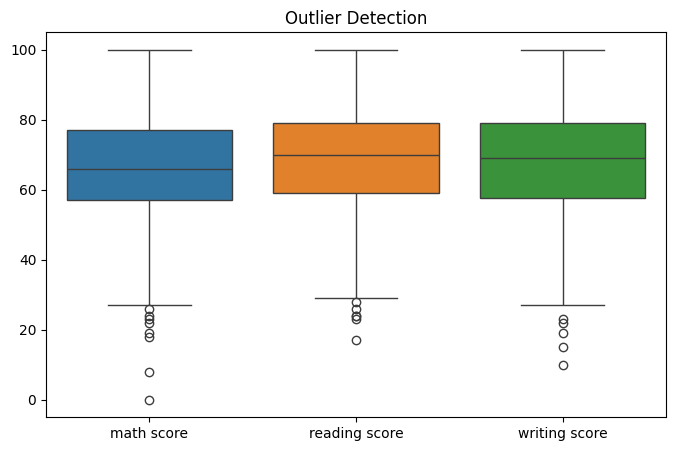

In [6]:
# Boxplot to detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title("Outlier Detection")
plt.show()

# No strong outliers usually, but we can remove if needed:
# Example (Remove students with extremely low scores in all 3 subjects)
df = df[~((df['math score'] < 20) & (df['reading score'] < 20) & (df['writing score'] < 20))]


In [7]:
# Remove duplicate entries
df = df.drop_duplicates()


In [8]:
# Create overall average score
df['overall_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)


In [9]:
def get_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 75:
        return 'B'
    elif score >= 60:
        return 'C'
    elif score >= 40:
        return 'D'
    else:
        return 'F'

df['grade'] = df['overall_score'].apply(get_grade)


In [10]:
df['math_minmax'] = (df['math score'] - df['math score'].min()) / (df['math score'].max() - df['math score'].min())


In [11]:
df['math_zscore'] = (df['math score'] - df['math score'].mean()) / df['math score'].std()


In [12]:
df['math_decimal'] = df['math score'] / (10**len(str(df['math score'].abs().max()).split('.')[0]))


In [13]:
def performance_level(score):
    if score >= 85:
        return 'Excellent'
    elif score >= 70:
        return 'Good'
    elif score >= 50:
        return 'Average'
    else:
        return 'Poor'

df['performance_level'] = df['overall_score'].apply(performance_level)


In [14]:
df.head(10)   # shows first 10 rows of your final cleaned dataset


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_score,grade,math_minmax,math_zscore,math_decimal,performance_level
0,female,group b,bachelor's degree,standard,none,72,72,74,72.666667,C,0.695652,0.388993,0.072,Good
1,female,group c,some college,standard,completed,69,90,88,82.333333,B,0.663043,0.189333,0.069,Good
2,female,group b,master's degree,standard,none,90,95,93,92.666667,A,0.891304,1.586949,0.090,Excellent
3,male,group a,associate's degree,free/reduced,none,47,57,44,49.333333,D,0.423913,-1.274835,0.047,Poor
4,male,group c,some college,standard,none,76,78,75,76.333333,B,0.739130,0.655205,0.076,Good
5,female,group b,associate's degree,standard,none,71,83,78,77.333333,B,0.684783,0.322439,0.071,Good
6,female,group b,some college,standard,completed,88,95,92,91.666667,A,0.869565,1.453842,0.088,Excellent
7,male,group b,some college,free/reduced,none,40,43,39,40.666667,D,0.347826,-1.740707,0.040,Poor
8,male,group d,high school,free/reduced,completed,64,64,67,65.000000,C,0.608696,-0.143432,0.064,Average
9,female,group b,high school,free/reduced,none,38,60,50,49.333333,D,0.326087,-1.873813,0.038,Poor
